<a href="https://colab.research.google.com/github/apal9569/stackGAN/blob/master/stackGAN_stage1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget http://www.vision.caltech.edu/visipedia-data/CUB-200-2011/CUB_200_2011.tgz

--2019-07-21 16:06:41--  http://www.vision.caltech.edu/visipedia-data/CUB-200-2011/CUB_200_2011.tgz
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 34.208.54.77
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|34.208.54.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1150585339 (1.1G) [application/x-tar]
Saving to: ‘CUB_200_2011.tgz’

CUB_200_2011.tgz    100%[===================>]   1.07G  15.6MB/s    in 2m 17s  

2019-07-21 16:08:58 (8.02 MB/s) - ‘CUB_200_2011.tgz’ saved [1150585339/1150585339]



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive

/content/drive/My Drive


In [0]:
!mkdir intern_stackGAN

mkdir: cannot create directory ‘intern_stackGAN’: File exists


In [0]:
cd intern_stackGAN

/content/drive/My Drive/intern_stackGAN


In [0]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [0]:
!tar -xvf CUB_200_2011.tgz

In [0]:
!wget https://drive.google.com/open?id=0B3y_msrWZaXLT1BZdVdycDY5TEE&source=post_page---------------------------

--2019-07-21 16:23:33--  https://drive.google.com/open?id=0B3y_msrWZaXLT1BZdVdycDY5TEE
Resolving drive.google.com (drive.google.com)... 74.125.23.101, 74.125.23.139, 74.125.23.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.101|:443... connected.
HTTP request sent, awaiting response... 307 OK
Location: https://drive.google.com/file/d/0B3y_msrWZaXLT1BZdVdycDY5TEE/view?usp=drive_open [following]
--2019-07-21 16:23:34--  https://drive.google.com/file/d/0B3y_msrWZaXLT1BZdVdycDY5TEE/view?usp=drive_open
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘open?id=0B3y_msrWZaXLT1BZdVdycDY5TEE’

open?id=0B3y_msrWZa     [ <=>                ] 119.86K   728KB/s    in 0.2s    

2019-07-21 16:23:34 (728 KB/s) - ‘open?id=0B3y_msrWZaXLT1BZdVdycDY5TEE’ saved [122733]



In [0]:
!ls

attributes.txt	birds.zip  CUB_200_2011


In [0]:
!unzip birds.zip

In [0]:
import pickle
import numpy as np
import pandas as pd
from PIL import Image
import PIL

In [0]:
train_dir="birds/train/"
test_dir="birds/test/"

In [0]:
train_embedd_path=train_dir+"char-CNN-RNN-embeddings.pickle"
test_embedd_path=test_dir+"char-CNN-RNN-embeddings.pickle"

In [0]:
def embeddings(path):
  with open(path, 'rb') as f:
        embedd = pickle.load(f, encoding='latin1')
        embedd = np.array(embedd)
        print('embeddings: ', embedd.shape)
  return embedd

In [0]:
train_embedd=embeddings(train_embedd_path)
test_embedd=embeddings(test_embedd_path)

embeddings:  (8855, 10, 1024)
embeddings:  (2933, 10, 1024)


In [0]:
train_file_path=train_dir+"filenames.pickle"
test_file_path=test_dir+"filenames.pickle"

In [0]:
def files(path):
  with open(path,'rb') as f:
    file=pickle.load(f,encoding='latin1')
  return file

In [0]:
train_file=files(train_file_path)
test_file=files(test_file_path)

In [0]:
bounding_box_path="CUB_200_2011/bounding_boxes.txt"
images_path="CUB_200_2011/images.txt"

In [0]:
def bounding(box_path,image_path):
  bounding=pd.read_csv(box_path,header=None,delim_whitespace=True).astype('int32')
  images=pd.read_csv(image_path,header=None,delim_whitespace=True)
  files=images[1]
  boundingbox= {img_file[:-4]: [] for img_file in files[:1]}

  for i in range(0, len(files)):
      bounding_box = bounding.iloc[i][1:].tolist()
      key = files[i][:-4]
      boundingbox[key] = bounding_box

  return filename_boundingbox_dict

In [0]:
boundingbox=bounding(bounding_box_path,images_path)

In [0]:
train_classid=train_dir+"class_info.pickle"
test_classid=test_dir+"class_info.pickle"

In [0]:
def image_ids(path):
  with open(path,'rb') as f:
    ids=pickle.load(f,encoding='latin1')
  return ids

In [0]:
train_id=image_ids(train_classid)
test_id=image_ids(test_classid)

In [0]:
def images(file,box):
  img = Image.open(file).convert('RGB')
  width, height = img.size
  image_size=64
  R = int(np.maximum(box[2], box[3]) * 0.75)
  x = int((2 * box[0] + box[2]) / 2)
  y = int((2 * box[1] + box[3]) / 2)
  img = img.crop([x-R, y-R, x+R, y+R])
  img = img.resize((64,64),Image.BILINEAR)
  return img

In [0]:
def mappings(file,box,embedding,ids):
  imgs, imgs_id, embeddings = [], [], []

  for index, filename in enumerate(file):
        
    boxes = box[filename]
      
    img_name = '{}/images/{}.jpg'.format("CUB_200_2011", filename)
    img = images(img_name, boxes)

    embeddings1 = embedding[index, :, :]

    embedding_ix = np.random.randint(0, embeddings1.shape[0] - 1)
    embedd = embeddings1[embedding_ix, :]
        
    imgs.append(np.array(img))
    imgs_id.append(ids[index])
    embeddings.append(embedd)
      
  imgs = np.array(imgs)
  imgs_id = np.array(imgs_id)
  embeddings = np.array(embeddings)
  return imgs, imgs_id, embeddings

In [0]:
train_imgs,train_imgs_id,train_embedd=mappings(train_file,boundingbox,train_embedd,train_id)
test_imgs,test_imgs_id,test_embedd=mappings(test_file,boundingbox,test_embedd,test_id)

(8855, 1024)

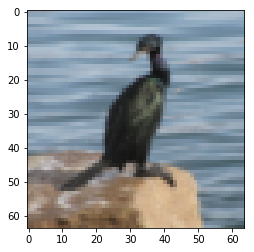

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_imgs[1000])
train_embedd.shape

In [0]:
import keras
import os
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import *
from keras.models import Model
from keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.optimizers import RMSprop
from keras import backend as K
from keras.models import *

Using TensorFlow backend.


In [0]:
def generator1():
  input1=Input(shape=(1024,))
  x=Dense(256)(input1)
  x=LeakyReLU()(x)
  c=Lambda(gene_c)(x)
  
  input2=Input(shape=(100,))
  
  x=concatenate([c,input2])
  
  x = Dense(128 * 8 * 4 * 4, use_bias=False)(x)
  x = ReLU()(x)

  x = Reshape((4, 4, 128 * 8), input_shape=(128 * 8 * 4 * 4,))(x)

  x = Conv2DTranspose(512, kernel_size=3,strides=2, padding="same", use_bias=False)(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = Conv2DTranspose(256, kernel_size=3,strides=2 ,padding="same", use_bias=False)(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Conv2DTranspose(128, kernel_size=3,strides=2 ,padding="same", use_bias=False)(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = Conv2DTranspose(64, kernel_size=3, strides=2,padding="same", use_bias=False)(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = Conv2D(3, kernel_size=3, padding="same", strides=1, use_bias=False)(x)
  out = Activation(activation='tanh')(x)
  print(out.shape)
  model = Model(inputs=[input1, input2], outputs=[out,c])
  return model

In [0]:
def gene_c(layer):
  mean = layer[:,:128]
  log_sigma = layer[:, 128:]
  stddev = K.exp(log_sigma)
  epsilon = K.random_normal(shape=K.constant((mean.shape[1],), dtype='int32'))
  c = stddev*epsilon+mean
  return c

In [0]:
def embedd_generator():
  inp=Input(shape=(1024,))
  x=Dense(256)(inp)
  x=LeakyReLU()(x)
  
  model=Model(inputs=inp,outputs=x)
  return model

In [0]:
def embedd_discriminator():
  inp=Input(shape=(1024,))
  x=Dense(128)(inp)
  out=LeakyReLU()(x)
  
  model=Model(inputs=inp,outputs=out)
  return model

In [0]:
def discriminator1():
  input1 = Input(shape=(64, 64, 3))

  x = Conv2D(64, (4, 4),padding='same', strides=2,input_shape=(64, 64, 3))(input1)
  x = LeakyReLU(alpha=0.2)(x)

  x = Conv2D(128, (4, 4), padding='same', strides=2, use_bias=False)(x)
  x = BatchNormalization()(x)
  x = LeakyReLU(alpha=0.2)(x)

  x = Conv2D(256, (4, 4), padding='same', strides=2, use_bias=False)(x)
  x = BatchNormalization()(x)
  x = LeakyReLU(alpha=0.2)(x)

  x = Conv2D(512, (4, 4), padding='same', strides=2, use_bias=False)(x)
  x = BatchNormalization()(x)
  x = LeakyReLU(alpha=0.2)(x)

  input2 = Input(shape=(4, 4, 128))
  concat_input = concatenate([x, input2])
  x = Conv2D(64 * 8, kernel_size=1,padding="same", strides=1)(concat_input)
  x = BatchNormalization()(x)
  x = LeakyReLU(alpha=0.2)(x)
  x = Flatten()(x)
  x = Dense(1)(x)
  out = Activation('sigmoid')(x)

  model = Model(inputs=[input1, input2], outputs=out)
  return model

In [0]:
def complete():
  input1=Input(shape=(1024,))
  input2=Input(shape=(100,))
  input3=Input(shape=(4,4,128))
  
  gen=generator1()
  out1,c=gen([input1,input2])
  gen.compile(loss='mse',optimizer='RMSprop',metrics=['mae'])
  
  disc=discriminator1()
  disc.trainable = False 
  disc.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['mae'])
  out2=disc([out1,input3])
  
  model=Model(inputs=[input1,input2,input3],outputs=[c,out2])
  
  return disc,gen,model

In [0]:
def KL_loss(y_true, y_pred):
    mean = y_pred[:, :128]
    logsigma = y_pred[:, :128]
    loss = -logsigma + .5 * (-1 + K.exp(2. * logsigma) + K.square(mean))
    loss = K.mean(loss)
    return loss


In [0]:
def custom_generator_loss(y_true, y_pred):
    return K.binary_crossentropy(y_true, y_pred)

In [0]:
embedd_gen = embedd_generator()
embedd_gen.compile(loss="binary_crossentropy", optimizer="adam")

embedd_disc = embedd_discriminator()
embedd_disc.compile(loss="binary_crossentropy", optimizer="adam")

Disc, Gen, GAN = complete()
GAN.compile(loss=['binary_crossentropy', KL_loss], loss_weights=[1, 2.0],
                              optimizer='RMSprop', metrics=None)


W0728 11:10:29.228870 140398772721536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


(?, ?, ?, 3)


In [0]:
Disc.summary(),Gen.summary(),GAN.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 64)   3136        input_8[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_4 (LeakyReLU)       (None, 32, 32, 64)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 128)  131072      leaky_re_lu_4[0][0]              
__________________________________________________________________________________________________
batch_norm

(None, None, None)

In [0]:
def training(epochs=1000):
  batch=64
  for epoch in range(epochs):
    for i in range(int(train_imgs.shape[0]/batch)):
      noise = np.random.normal(0, 1, size=(batch, 100))
      img_batch = train_imgs[i * batch:(i + 1) * batch]
      embedd_batch = train_embedd[i * batch:(i + 1) * batch]
      img_batch = (img_batch - 127.5) / 127.5
    
      fake,_=Gen.predict([embedd_batch,noise])
    
      embedd_disc_add = embedd_disc.predict_on_batch(embedd_batch)
      embedd_disc_add = np.reshape(embedd_disc_add, (-1, 1, 1,128))
      embedd_disc_add= np.tile(embedd_disc_add, (1, 4, 4, 1))

      dis_loss_real = Disc.train_on_batch([img_batch, embedd_disc_add],np.ones((batch,1),dtype='float64'))
      dis_loss_fake = Disc.train_on_batch([fake, embedd_disc_add],np.zeros((batch,1),dtype='float64'))
      
      g_loss=GAN.train_on_batch([embedd_batch,noise, embedd_disc_add],[K.ones((batch, 128)), K.ones((batch, 1))])
    
    if epoch % 2 == 0:
      noise2 = np.random.normal(0, 1, size=(batch, 100))
      embedding_batch = test_embedd[0:batch]
      fake_images, _ = Gen.predict_on_batch([embedd_batch, noise2])
    print(epoch)
                                                                                 

In [0]:
training()

In [0]:
Gen.save('gen.h5')
GAN.save('gan.h5')
Disc.save('disc.h5')
embedd_gen.save('embedd_gen.h5')
embedd_disc.save('embedd_disc.h5')

In [0]:
Gen=load_model('gen.h5')
GAN=load_model('gan.h5',custom_objects={'KL_loss':KL_loss})
Disc=load_model('disc.h5')
embedd_gen=load_model('embedd_gen.h5')
embedd_disc=load_model('embedd_disc.h5')

W0729 05:02:28.919052 140359327553408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 05:02:28.974695 140359327553408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 05:02:28.997928 140359327553408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0729 05:02:29.060856 140359327553408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 05:02:29.061740 140359327553408 deprecation_wr